Gabriel Riegner: 12 OCT 2024

---
**Problem 1**: Linear discriminant analysis

Design a simulation study that replicates Figure 1.1 of the High-Dimensional Statistics textbook. There are two population level curves and one empirical.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.rcParams.update({"axes.grid": True, "font.size": 10})
rng = np.random.default_rng(seed=0)


def classical(gamma):  # eq: 1.2
    return norm.cdf(-gamma / 2)


def high_dimensional(gamma, alpha):  # eq: 1.6
    return norm.cdf(-(gamma**2) / (2 * np.sqrt(gamma**2 + 2 * alpha)))


def psi(x, mu1_, mu2_):  # eq: 1.5
    return ((x - (mu1_ + mu2_) / 2)) @ (mu1_ - mu2_)

In [2]:
# Fig 1.1 (a)

# setting
n, d = 800, 400
alpha = d / n
n_gammas, n_trials = 11, 50
gammas = np.linspace(1, 2, n_gammas)

# empirical
a_errors_ = np.zeros((n_gammas, n_trials))
for gamma_idx in range(n_gammas):
    for trial_idx in range(n_trials):

        mu1 = np.zeros(shape=d)
        mu2 = rng.normal(size=d)
        mu2 = gammas[gamma_idx] * (mu2 / np.linalg.norm(mu2))

        x1_train = rng.multivariate_normal(mean=mu1, cov=np.eye(d), size=n)
        x2_train = rng.multivariate_normal(mean=mu2, cov=np.eye(d), size=n)

        mu1_ = x1_train.mean(axis=0)
        mu2_ = x2_train.mean(axis=0)

        x1_test = rng.multivariate_normal(mean=mu1, cov=np.eye(d), size=n)
        x2_test = rng.multivariate_normal(mean=mu2, cov=np.eye(d), size=n)

        p1_ = (psi(x1_test, mu1_, mu2_) <= 0).mean()
        p2_ = (psi(x2_test, mu1_, mu2_) > 0).mean()

        a_errors_[gamma_idx, trial_idx] = (p1_ + p2_) / 2

In [3]:
# Fig 1.1 (b)

# setting
d = 400
gamma = 2
n_alphas, n_trials = 20, 50
alphas = np.linspace(0.1, 1, n_alphas)

# empirical
b_errors_ = np.zeros((n_alphas, n_trials))
for alpha_idx in range(n_alphas):
    for trial_idx in range(n_trials):

        n = int(d / alphas[alpha_idx])

        mu1 = np.zeros(shape=d)
        mu2 = rng.normal(size=d)
        mu2 = gamma * (mu2 / np.linalg.norm(mu2))

        x1_train = rng.multivariate_normal(mean=mu1, cov=np.eye(d), size=n)
        x2_train = rng.multivariate_normal(mean=mu2, cov=np.eye(d), size=n)

        mu1_ = x1_train.mean(axis=0)
        mu2_ = x2_train.mean(axis=0)

        x1_test = rng.multivariate_normal(mean=mu1, cov=np.eye(d), size=n)
        x2_test = rng.multivariate_normal(mean=mu2, cov=np.eye(d), size=n)

        p1_ = (psi(x1_test, mu1_, mu2_) <= 0).mean()
        p2_ = (psi(x2_test, mu1_, mu2_) > 0).mean()

        b_errors_[alpha_idx, trial_idx] = (p1_ + p2_) / 2

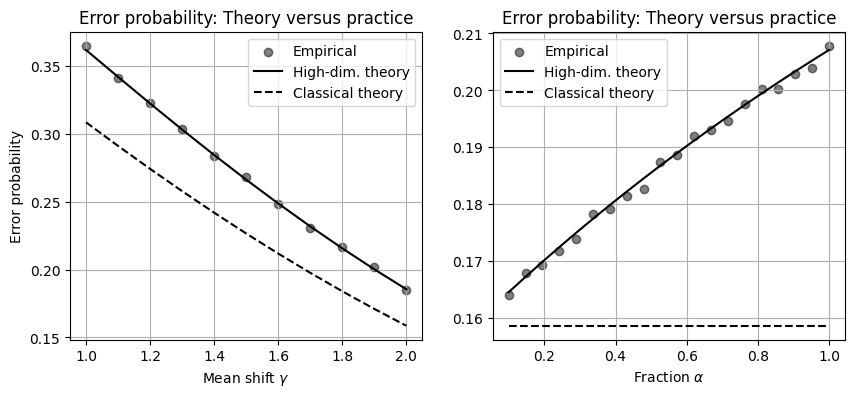

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Fig 1.1 (a)
axs[0].set_title("Error probability: Theory versus practice")
axs[0].set_xlabel(r"Mean shift $\gamma$")
axs[0].set_ylabel("Error probability")
axs[0].scatter(gammas, a_errors_.mean(axis=1), color="k", alpha=0.5, label="Empirical")
axs[0].plot(gammas, high_dimensional(gammas, alpha), ls="-", color="k", label="High-dim. theory")
axs[0].plot(gammas, classical(gammas), ls="--", color="k", label="Classical theory")
axs[0].legend()

# Fig 1.1 (b)
axs[1].set_title("Error probability: Theory versus practice")
axs[1].set_xlabel(r"Fraction $\alpha$")
axs[1].scatter(alphas, b_errors_.mean(axis=1), color="k", alpha=0.5, label="Empirical")
axs[1].plot(alphas, high_dimensional(gamma, alphas), ls="-", color="k", label="High-dim. theory")
axs[1].plot(alphas, classical(gamma).repeat(n_alphas), ls="--", color="k", label="Classical theory")
axs[1].legend()

---

**Problem 2**: Nonparametric regression

Design a simulation study that replicates Figure 1.3 of the High-Dimensional Statistics textbook. There is one population level curve and one empirical.

In [5]:
def lower_bound(n, d):  # eq: 1.14
    return np.log(d / (2 * (d + 1))) - (np.log(n) / d)

In [6]:
# Fig 1.3 (a-b)

# settings
n_dims, n_trials = 12, 20
dims = np.linspace(2, 101, 12, dtype="int")
a_ns = 2 * dims
b_ns = dims**2

a_distances_ = np.zeros((n_dims, n_trials))
b_distances_ = np.zeros((n_dims, n_trials))
for idx in range(n_dims):
    for trial_idx in range(n_trials):
        # (a)
        X = rng.uniform(low=0, high=1, size=(a_ns[idx], dims[idx]))
        x_prime = rng.uniform(low=0, high=1, size=int(dims[idx]))
        rho_inf = np.min(np.linalg.norm(x_prime - X, ord=np.inf, axis=1))
        a_distances_[idx, trial_idx] = rho_inf

        # (b)
        X = rng.uniform(low=0, high=1, size=(b_ns[idx], dims[idx]))
        x_prime = rng.uniform(low=0, high=1, size=int(dims[idx]))
        rho_inf = np.min(np.linalg.norm(x_prime - X, ord=np.inf, axis=1))
        b_distances_[idx, trial_idx] = rho_inf

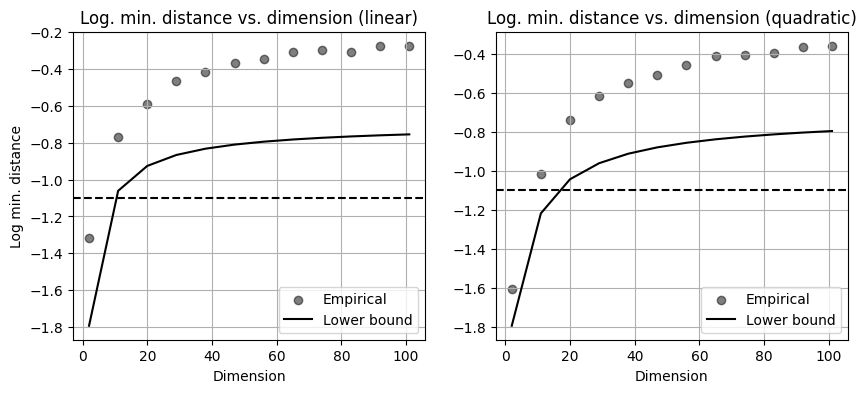

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Fig 1.3 (a)
axs[0].set_title("Log. min. distance vs. dimension (linear)")
axs[0].set_xlabel("Dimension")
axs[0].set_ylabel("Log min. distance")
axs[0].scatter(dims, np.log(a_distances_.mean(axis=1)), color="k", alpha=0.5, label="Empirical")
axs[0].plot(dims, lower_bound(a_ns, dims), ls="-", color="k", label="Lower bound")
axs[0].axhline(y=np.log(1 / 3), linestyle="--", color="k")
axs[0].legend()

# Fig 1.3 (b)
axs[1].set_title("Log. min. distance vs. dimension (quadratic)")
axs[1].set_xlabel("Dimension")
axs[1].scatter(dims, np.log(b_distances_.mean(axis=1)), color="k", alpha=0.5, label="Empirical")
axs[1].plot(dims, lower_bound(b_ns, dims), ls="-", color="k", label="Lower bound")
axs[1].axhline(y=np.log(1 / 3), linestyle="--", color="k")
axs[1].legend()